<a href="https://colab.research.google.com/github/Guru-Guna/basic-nn-model/blob/main/Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('deeplearning').sheet1
rows = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'float','Output':'float'})

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'float','Output':'float'})
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df.head()

,Input,Output
0,1.0,5.0
1,2.0,9.0
2,3.0,13.0
3,4.0,17.0
4,5.0,21.0


In [ ]:
x=df[['Input']].values
y=df[['Output']].values

In [ ]:
x

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=11)

In [ ]:
Scaler=MinMaxScaler()
Scaler.fit(x_train)
Scaler.fit(x_test)

MinMaxScaler()

In [ ]:
x_train1=Scaler.transform(x_train)
x_test1=Scaler.transform(x_test)

In [ ]:
x_train1

array([[ 0.375 ],
       [ 0.9375],
       [ 0.0625],
       [ 0.5   ],
       [-0.1875],
       [ 0.3125],
       [-0.0625],
       [ 0.25  ],
       [-0.125 ],
       [ 0.5625],
       [ 0.625 ],
       [ 0.875 ],
       [ 0.8125]])

In [ ]:
ai_brain = Sequential([
    Dense(6,activation='relu'),
    Dense(4,activation='relu'),
    Dense(1)
])

In [ ]:
ai_brain.compile(
    optimizer='rmsprop',
    loss='mse'
)

In [ ]:
ai_brain.fit(x_train1,y_train,epochs=4000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 22ms/step - loss: 12.0145
Epoch 1502/4000
1/1 [==============================] - 0s 11ms/step - loss: 11.8699
Epoch 1503/4000
1/1 [==============================] - 0s 12ms/step - loss: 11.7261
Epoch 1504/4000
1/1 [==============================] - 0s 11ms/step - loss: 11.5832
Epoch 1505/4000
1/1 [==============================] - 0s 13ms/step - loss: 11.4411
Epoch 1506/4000
1/1 [==============================] - 0s 12ms/step - loss: 11.2999
Epoch 1507/4000
1/1 [==============================] - 0s 14ms/step - loss: 11.1595
Epoch 1508/4000
1/1 [==============================] - 0s 11ms/step - loss: 11.0200
Epoch 1509/4000
1/1 [==============================] - 0s 11ms/step - loss: 10.8813
Epoch 1510/4000
1/1 [==============================] - 0s 13ms/step - loss: 10.7435
Epoch 1511/4000
1/1 [==============================] - 0s 11ms/step - loss: 10.6065
Epoch 1512/4000
1/1 [====================

<AxesSubplot:>

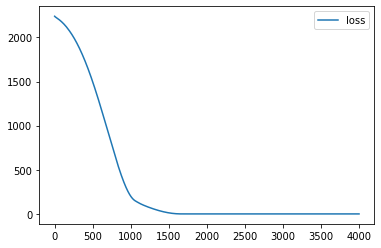

In [ ]:
loss_df=pd.DataFrame(ai_brain.history.history)
loss_df.plot()

Text(0.5, 1.0, 'Training Loss Vs Iteration Plot')

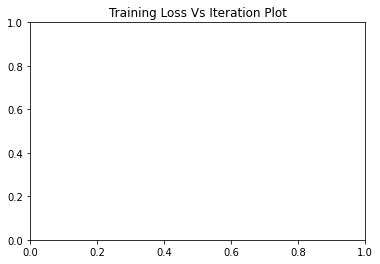

In [ ]:
plt.title('Training Loss Vs Iteration Plot')

In [ ]:
ai_brain.evaluate(x_test1,y_test)
x_n1=[[66]]
x_n1_1=Scaler.transform(x_n1)
ai_brain.predict(x_n1_1)

1/1 [==============================] - 0s 106ms/step


array([[265.23706]], dtype=float32)